# Toyota_Corolla_Multilinear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
cp = pd.read_csv('ToyotaCorolla.csv', encoding= 'unicode_escape')

In [3]:
cp.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
cp.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [6]:
df = cp[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [7]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
df.columns=["Price","Age","KM","HP","cc","Doors","Gears","QuarterlyTax","Weight"]
df

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
df.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QuarterlyTax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1436 non-null   int64
 1   Age           1436 non-null   int64
 2   KM            1436 non-null   int64
 3   HP            1436 non-null   int64
 4   cc            1436 non-null   int64
 5   Doors         1436 non-null   int64
 6   Gears         1436 non-null   int64
 7   QuarterlyTax  1436 non-null   int64
 8   Weight        1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
df.isna().sum()

Price           0
Age             0
KM              0
HP              0
cc              0
Doors           0
Gears           0
QuarterlyTax    0
Weight          0
dtype: int64

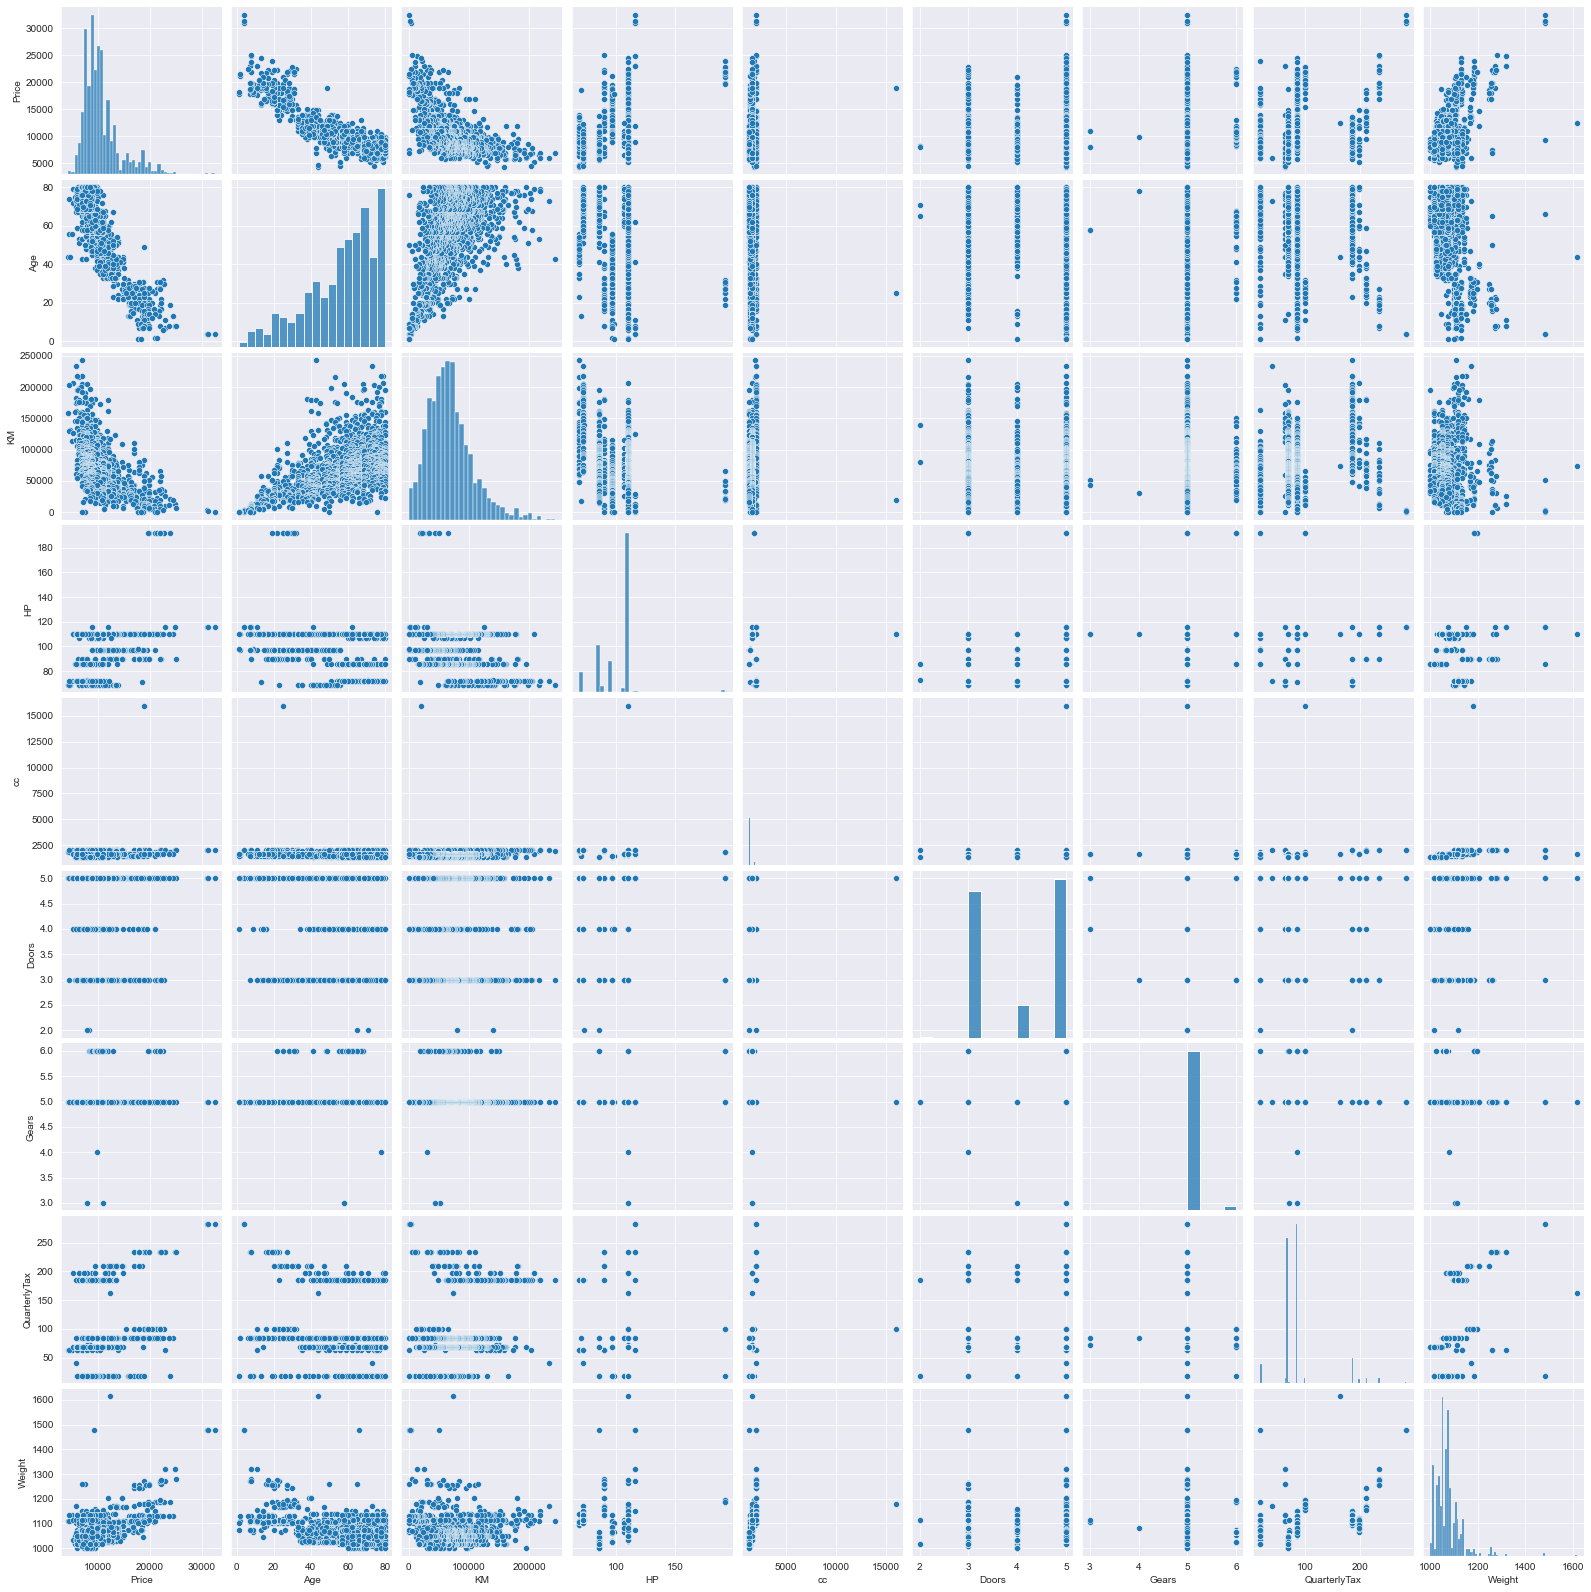

In [12]:
sns.set_style(style = 'darkgrid')
sns.pairplot(df)


# Model Building

In [13]:
## Build a model
import statsmodels.formula.api as smf
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= df).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:12:52   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age           -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM              -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP              31.6809      2.818     11.241      0.000      26.152      37.209
cc              -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors           -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears          594.3199    197.055      3.016      0.003     207.771     980.869
QuarterlyTax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight          16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model2 = smf.ols('Price~Age+KM+HP+cc+Gears+QuarterlyTax+Weight', data= df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:12:52   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age           -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM              -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP              31.6728      2.810     11.270      0.000      26.160      37.186
cc              -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears          595.8324    193.400      3.081      0.002     216.453     975.212
QuarterlyTax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight          16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model3 = smf.ols('Price~Age+KM+HP+Gears+QuarterlyTax+Weight', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:12:52   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age           -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM              -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP              31.3269      2.799     11.191      0.000      25.836      36.818
Gears          598.9653    193.441      3.096      0.002     219.507     978.424
QuarterlyTax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight          16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [17]:
### Simple Linear Regresssion for cc and Doors
ml_cc = smf.ols('Price~cc', data= df).fit()
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.55e-06
Time:                        08:12:52   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
ml_doors = smf.ols('Price~Doors', data= df).fit()
ml_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.46e-12
Time:                        08:12:52   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calcalating VIF

In [19]:
### VIF Values Calculating

rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= df).fit().rsquared
vif_age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+HP+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+QuarterlyTax+Weight',data=df).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_QuarterlyTax = smf.ols('QuarterlyTax~Age+KM+HP+cc+Doors+Gears+Weight', data=df).fit().rsquared
vif_QuarterlyTax = 1/(1-rsq_QuarterlyTax)

rsq_Weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QuarterlyTax', data=df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

vif = {'Variables': ['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QuarterlyTax',
       'Weight'], 'VIF': [vif_age, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears, vif_QuarterlyTax, vif_Weight]}
Vif_Values = pd.DataFrame(vif)
Vif_Values

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156278
5,Gears,1.059085
6,QuarterlyTax,2.311431
7,Weight,2.516420


# Test for Normality of Residuals (Q-Q Plots)

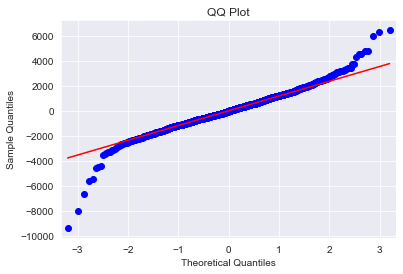

In [20]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid, line = 'q')
plt.title('QQ Plot')
plt.show()

In [21]:
list(np.where(model1.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [22]:
list(np.where(model1.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]


# Residual Plot for Homoscedasticity

In [23]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

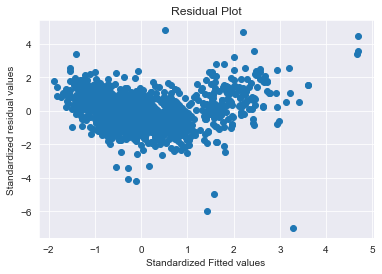

In [25]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals Vs Regressors Plots

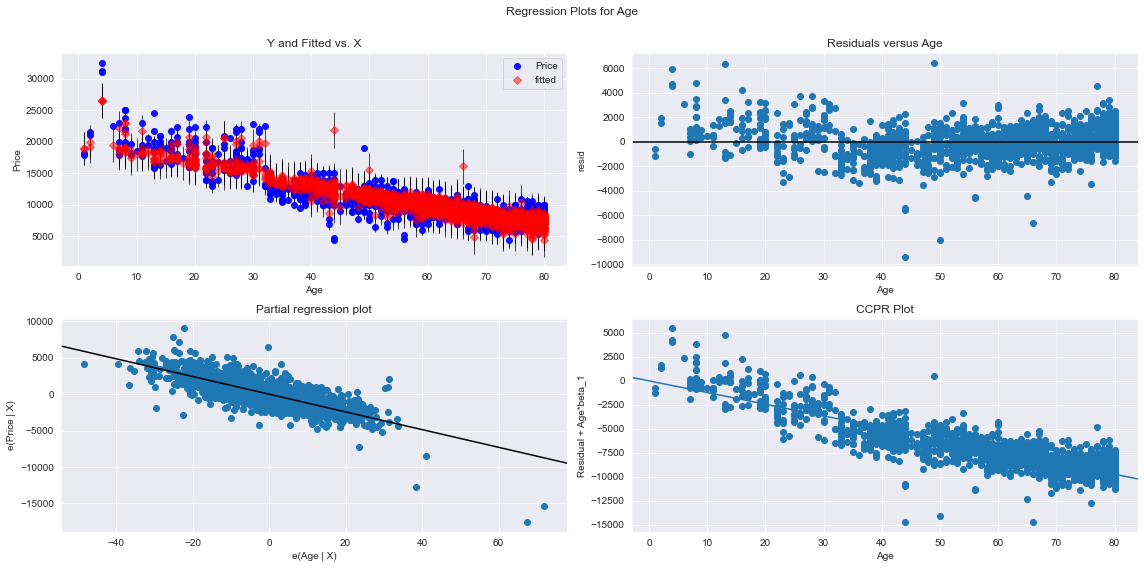

In [26]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model1, 'Age', fig=fig)
plt.show()

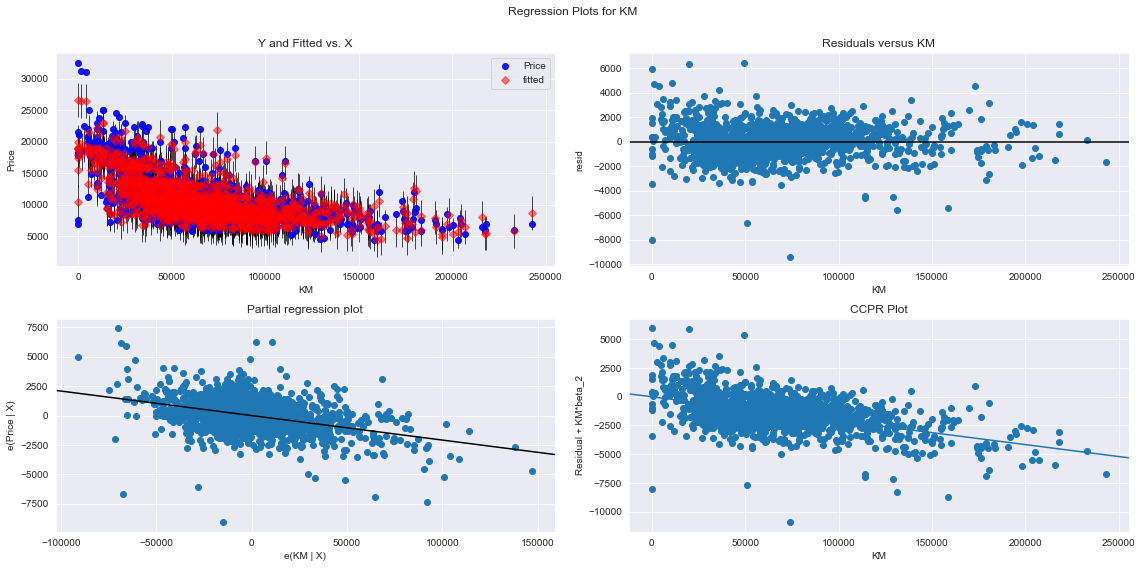

In [27]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model1, 'KM', fig=fig)
plt.show()

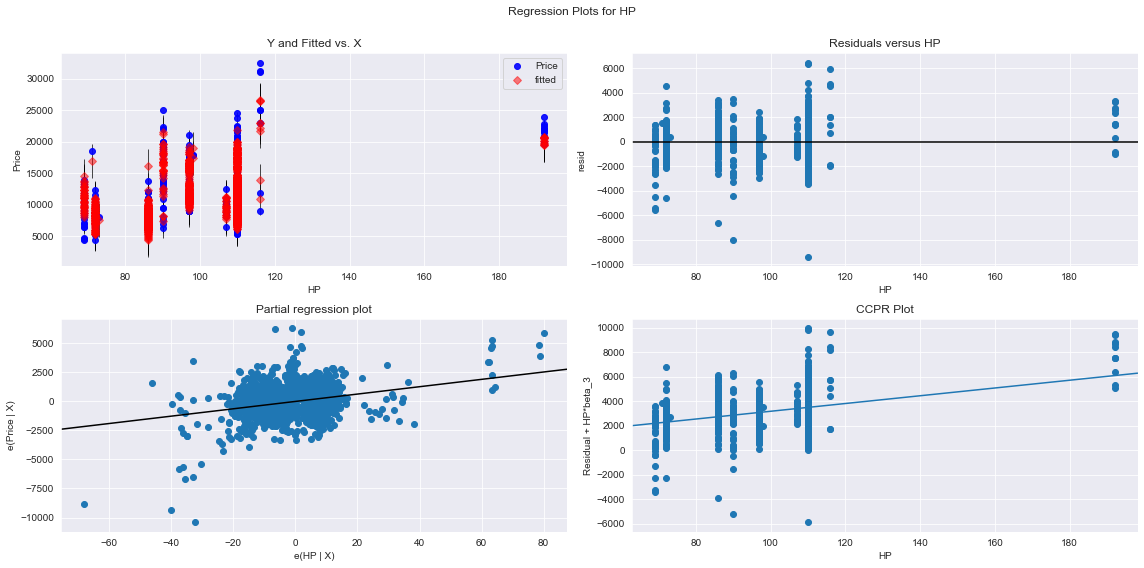

In [28]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model1, 'HP', fig=fig)
plt.show()

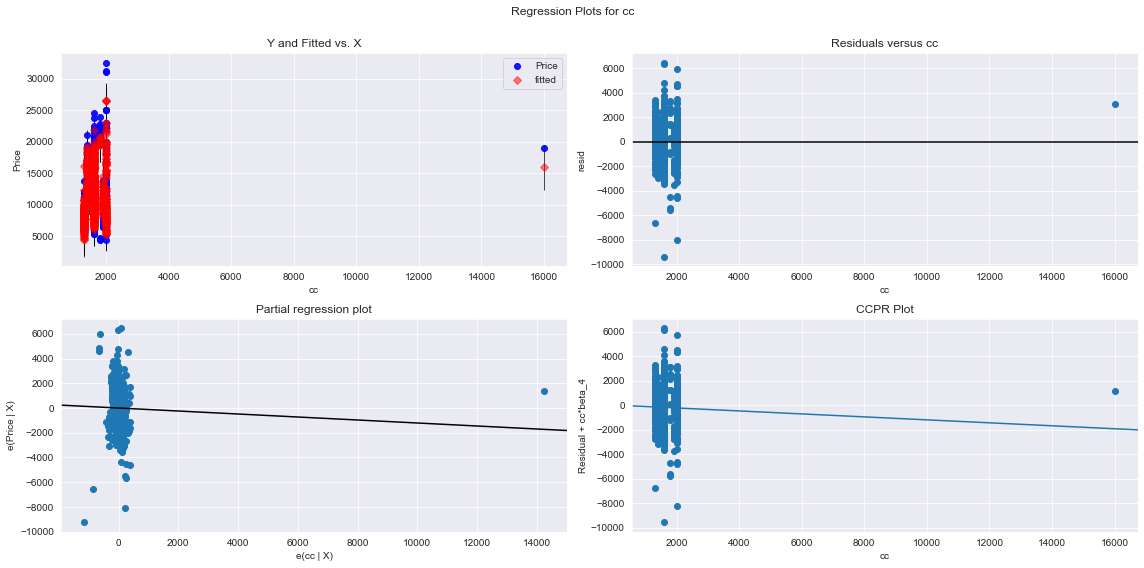

In [29]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model1, 'cc', fig=fig)
plt.show()

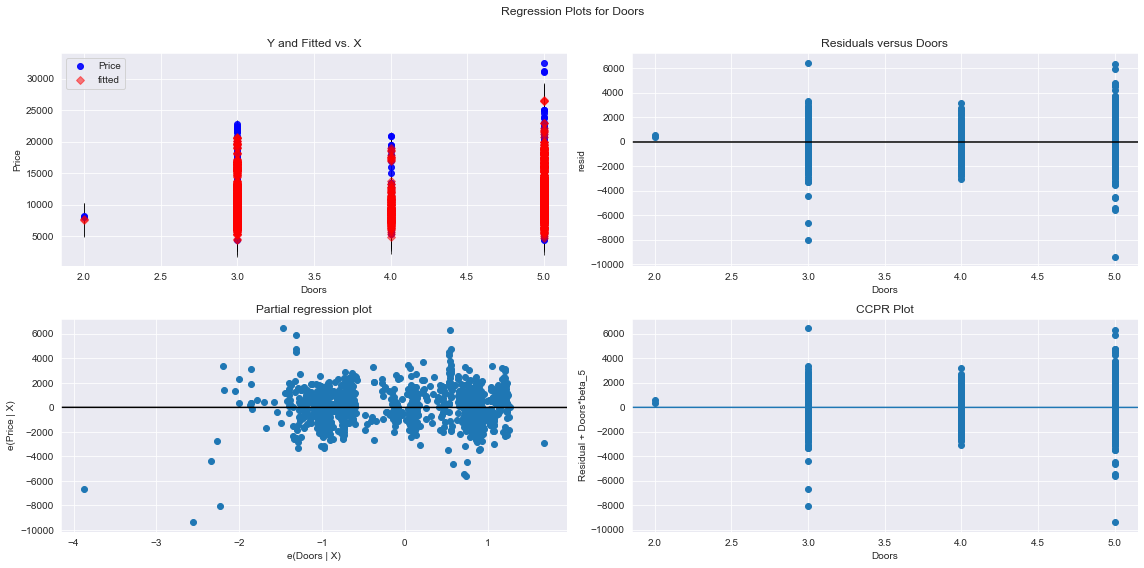

In [30]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model1, 'Doors', fig=fig)
plt.show()

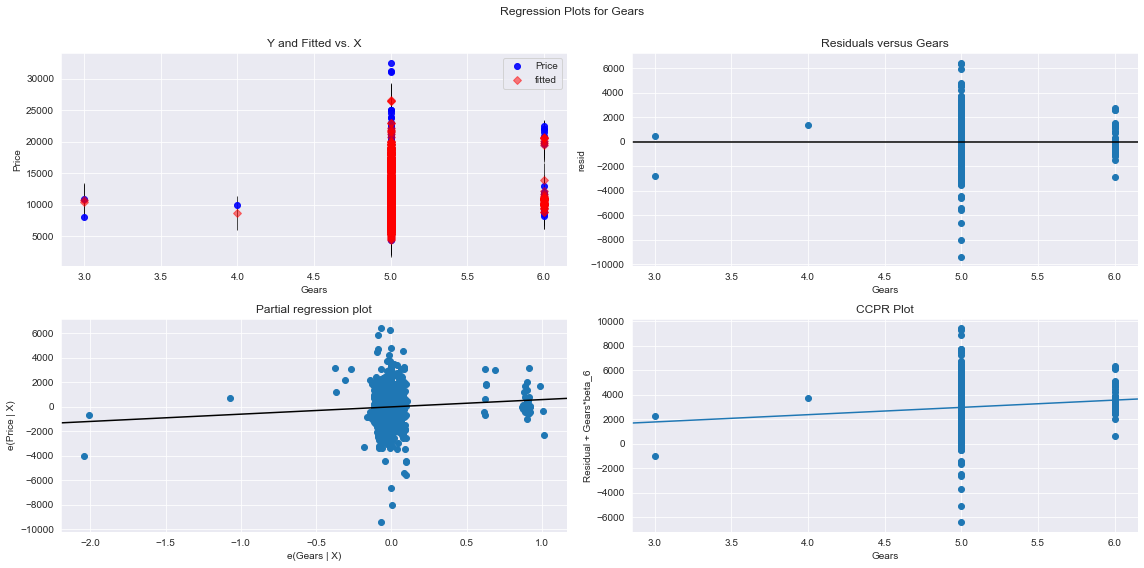

In [31]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model1, 'Gears', fig=fig)
plt.show()

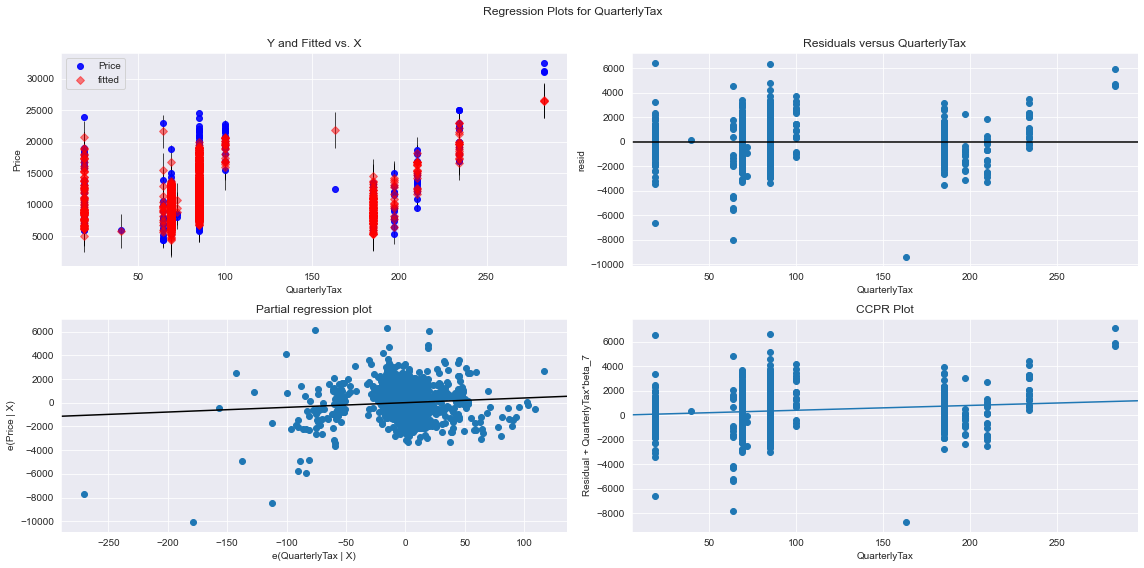

In [32]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model1, 'QuarterlyTax', fig=fig)
plt.show()

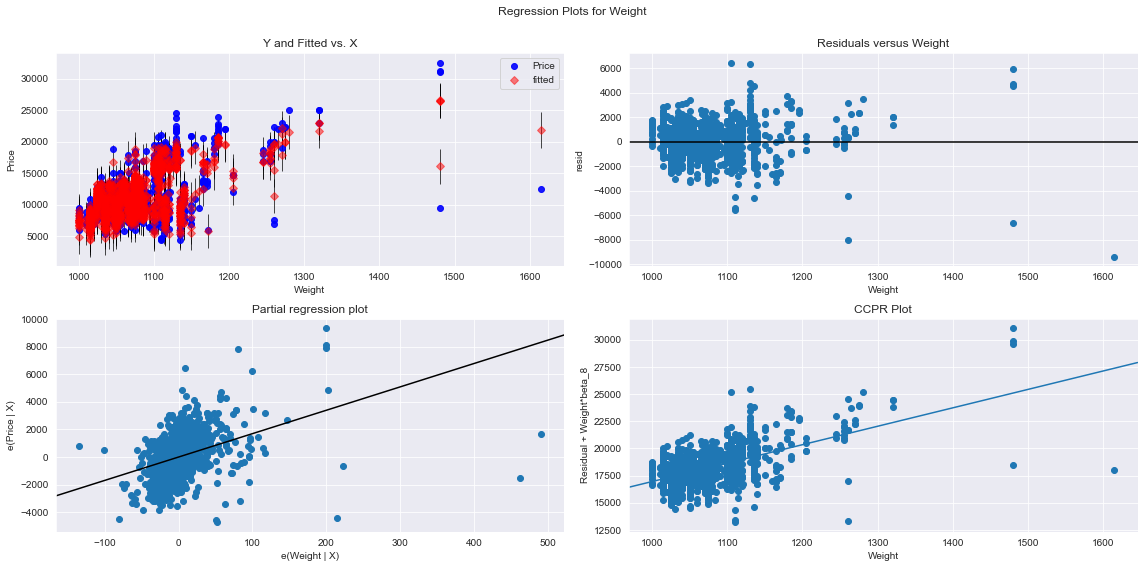

In [33]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model1, 'Weight', fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Outliers/Influencers

# Cook's Distance

In [35]:
model1_influence = model1.get_influence()
(c,_) = model1_influence.cooks_distance

In [36]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

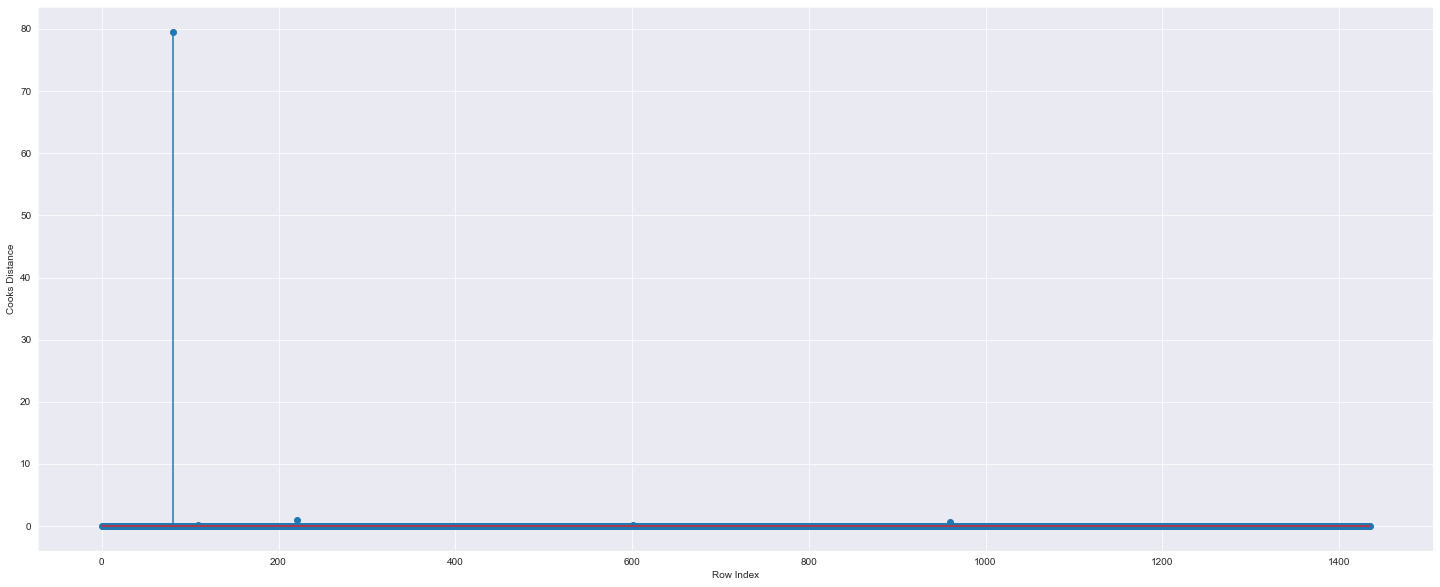

In [37]:
fig = plt.subplots(figsize =(25,10))
plt.stem(np.arange(len(df)), np.round(c,3), use_line_collection= True)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(80, 79.52010624141805)

# High Influence Point

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

NameError: name 'model' is not defined

In [40]:
a = df.shape[1]
b = df.shape[0]
leverage_cutoff = 3*((a+1)/b)
leverage_cutoff

0.020891364902506964

In [41]:
df[df.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [42]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Improving the Model

In [43]:
df_new = df.drop(df.index[80], axis=0).reset_index()

In [44]:
df_new

,index,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [45]:
df_new = df_new.drop(['index'], axis = 1)

In [46]:
df_new

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [47]:
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= df_new).fit()
print(model4.rsquared.round(3), '\n', model4.rsquared_adj.round(3))

0.869 
 0.869


In [48]:
model_influence_2 = model4.get_influence()
(c_2, _) = model_influence_2.cooks_distance

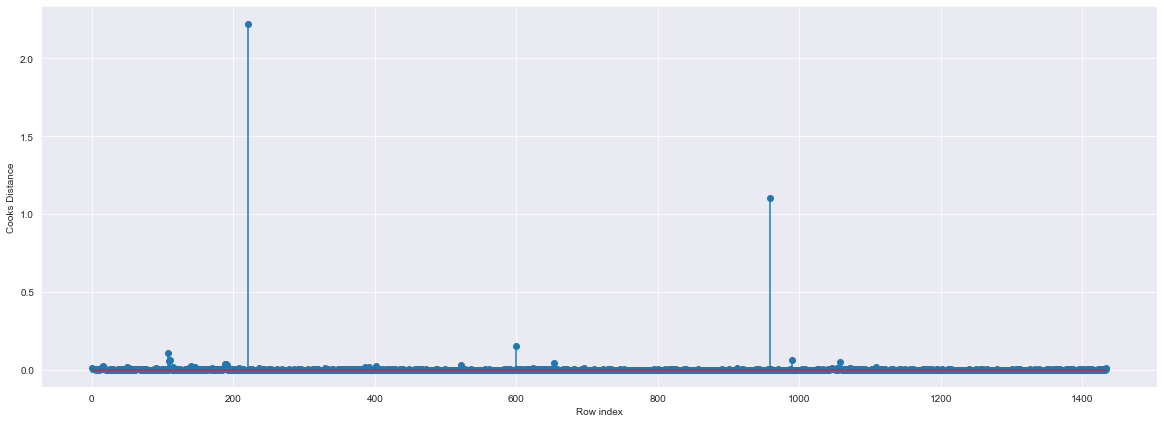

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)),np.round(c_2,3), use_line_collection= True)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
(np.argmax(c_2), np.max(c_2))

(220, 2.224461171300723)

In [51]:
df_new2 = df_new.drop(df_new.index[220], axis=0).reset_index()

In [52]:
df_new2

,index,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [53]:
df_new2 = df_new2.drop(['index'], axis = 1)
df_new2

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [54]:
model5 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= df_new2).fit()
print(model5.rsquared.round(3), '\n', model5.rsquared_adj.round(3))

0.878 
 0.877


In [55]:
model_influence_3 = model5.get_influence()
(c_3, _) = model_influence_3.cooks_distance

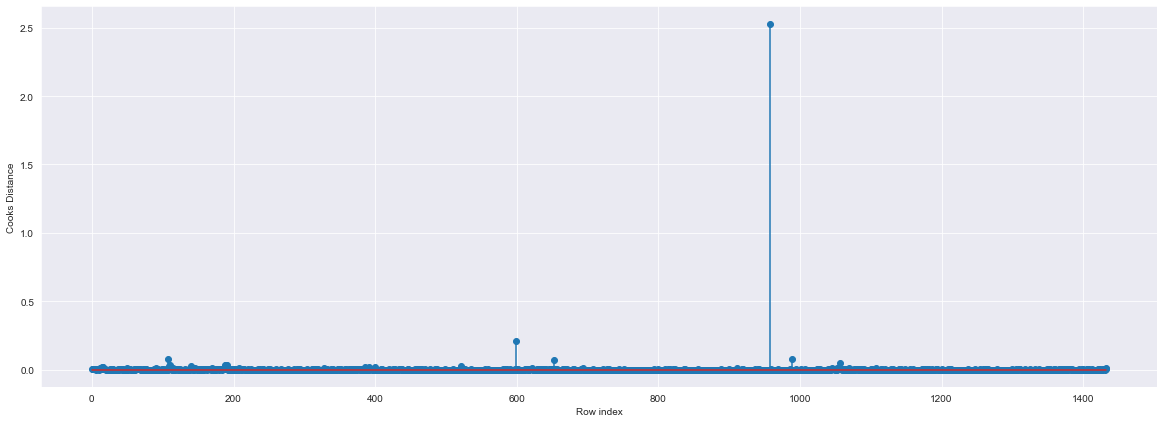

In [56]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new2)),np.round(c_3,3), use_line_collection= True)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [57]:
(np.argmax(c_3), np.max(c_3))

(958, 2.5312566930232503)

In [58]:
final_df = df_new2.drop(df_new.index[958], axis=0).reset_index()

In [59]:
final_df = final_df.drop(['index'], axis = 1)

In [60]:
final_df

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [61]:
final_model = smf.ols('Price~Age+np.sqrt(KM)+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= final_df).fit()
print(final_model.rsquared.round(3), '\n', final_model.rsquared_adj.round(3))

0.886 
 0.885


In [62]:
model_influence_4 = final_model.get_influence()
(c_4, _) = model_influence_4.cooks_distance

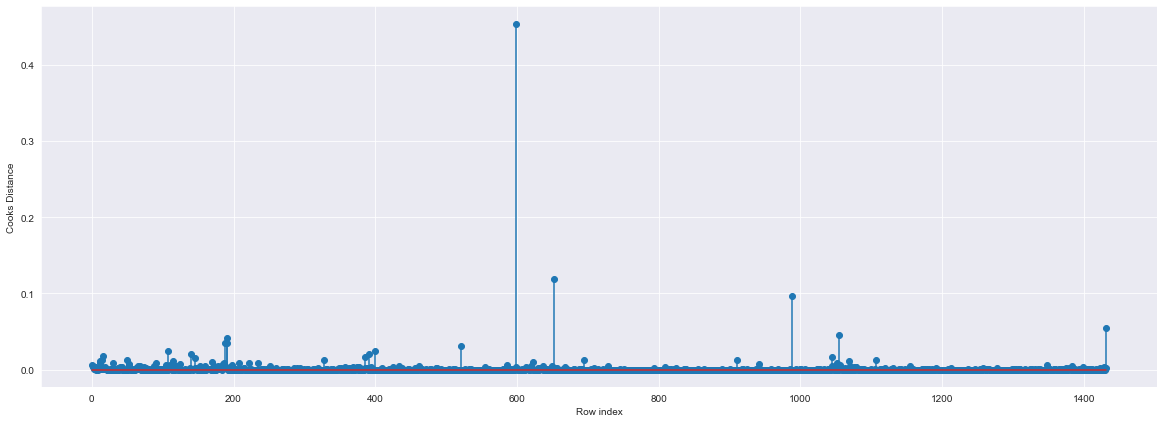

In [63]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(final_df)),np.round(c_4,3), use_line_collection= True)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
(np.argmax(c_4), np.max(c_4))

(599, 0.45370507472004895)

In [65]:
new_data = pd.DataFrame({'Age': 5, 'KM': 10000, 'HP': 300, 'cc': 1200, 'Doors': 4, 'Gears': 4, 'QuarterlyTax': 12000, 'Weight': 500 }, index =[1])

In [66]:
new_data

,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
1,5,10000,300,1200,4,4,12000,500


In [67]:
final_model.predict(new_data)

1    81265.198221
dtype: float64

In [68]:
final_model.predict(final_df.iloc[0:10])

0    16127.250995
1    15645.124347
2    16131.334074
3    15778.479552
4    15696.242066
5    15018.587237
6    17234.274645
7    17196.974026
8    21068.440155
9    13315.186152
dtype: float64

In [69]:
final_df.head(10)

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


# DataFrame for Rsquared Values of the Models.

In [70]:
m1_R_Val = model1.rsquared.round(3)
m2_R_Val = model2.rsquared.round(3)
m3_R_Val = model3.rsquared.round(3)
m4_R_Val = model4.rsquared.round(3)
m5_R_Val = model5.rsquared.round(3)
m6_R_Val = final_model.rsquared.round(3)

In [71]:
vif = {'Model': ['Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Final Model'], 'Rsquared Values': [m1_R_Val, m2_R_Val, m3_R_Val, m4_R_Val, m5_R_Val, m6_R_Val]}

VIF_Frame = pd.DataFrame(vif)

VIF_Frame

,Model,Rsquared Values
0,Model1,0.864
1,Model2,0.864
2,Model3,0.864
3,Model4,0.869
4,Model5,0.878
5,Final Model,0.886
